# ਜੈਨੇਟਿਕ ਐਲਗੋਰਿਥਮ

ਇਹ ਨੋਟਬੁੱਕ [AI for Beginners Curriculum](http://github.com/microsoft/ai-for-beginners) ਦਾ ਹਿੱਸਾ ਹੈ।


In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
import math
import time

## ਕੁਝ ਸਿਧਾਂਤ

**ਜੈਨੇਟਿਕ ਐਲਗੋਰਿਥਮ** (GA) **ਵਿਕਾਸੀ ਦ੍ਰਿਸ਼ਟੀਕੋਣ** 'ਤੇ ਆਧਾਰਿਤ ਹਨ, ਜਿਸ ਵਿੱਚ ਆਬਾਦੀ ਦੇ ਵਿਕਾਸ ਦੇ ਤਰੀਕੇ ਦੀ ਵਰਤੋਂ ਕੀਤੀ ਜਾਂਦੀ ਹੈ ਤਾਂ ਜੋ ਦਿੱਤੇ ਗਏ ਸਮੱਸਿਆ ਲਈ ਇੱਕ ਵਧੀਆ ਹੱਲ ਪ੍ਰਾਪਤ ਕੀਤਾ ਜਾ ਸਕੇ। ਇਹ 1975 ਵਿੱਚ [ਜੌਨ ਹੈਨਰੀ ਹੌਲੈਂਡ](https://en.wikipedia.org/wiki/John_Henry_Holland) ਦੁਆਰਾ ਪ੍ਰਸਤਾਵਿਤ ਕੀਤੇ ਗਏ ਸਨ।

ਜੈਨੇਟਿਕ ਐਲਗੋਰਿਥਮ ਹੇਠਾਂ ਦਿੱਤੀਆਂ ਵਿਚਾਰਧਾਰਾਵਾਂ 'ਤੇ ਆਧਾਰਿਤ ਹਨ:
* ਸਮੱਸਿਆ ਦੇ ਵੈਧ ਹੱਲਾਂ ਨੂੰ **ਜੀਨ** ਵਜੋਂ ਦਰਸਾਇਆ ਜਾ ਸਕਦਾ ਹੈ
* **ਕਰਾਸਓਵਰ** ਸਾਨੂੰ ਦੋ ਹੱਲਾਂ ਨੂੰ ਮਿਲਾ ਕੇ ਇੱਕ ਨਵਾਂ ਵੈਧ ਹੱਲ ਪ੍ਰਾਪਤ ਕਰਨ ਦੀ ਆਗਿਆ ਦਿੰਦਾ ਹੈ
* **ਚੋਣ** ਨੂੰ ਕੁਝ **ਫਿਟਨਸ ਫੰਕਸ਼ਨ** ਦੀ ਵਰਤੋਂ ਕਰਕੇ ਵਧੀਆ ਹੱਲਾਂ ਦੀ ਚੋਣ ਕਰਨ ਲਈ ਵਰਤਿਆ ਜਾਂਦਾ ਹੈ
* **ਮਿਊਟੇਸ਼ਨ** ਨੂੰ ਅਨੁਕੂਲਤਾ ਨੂੰ ਅਸਥਿਰ ਕਰਨ ਅਤੇ ਸਥਾਨਕ ਘੱਟੋ-ਘੱਟ ਤੋਂ ਬਾਹਰ ਨਿਕਲਣ ਲਈ ਪੇਸ਼ ਕੀਤਾ ਜਾਂਦਾ ਹੈ

ਜੇ ਤੁਸੀਂ ਜੈਨੇਟਿਕ ਐਲਗੋਰਿਥਮ ਲਾਗੂ ਕਰਨਾ ਚਾਹੁੰਦੇ ਹੋ, ਤਾਂ ਤੁਹਾਨੂੰ ਹੇਠਾਂ ਦਿੱਤੀਆਂ ਚੀਜ਼ਾਂ ਦੀ ਲੋੜ ਹੋਵੇਗੀ:

* **ਜੀਨ** $g\in\Gamma$ ਦੀ ਵਰਤੋਂ ਕਰਕੇ ਸਮੱਸਿਆ ਦੇ ਹੱਲਾਂ ਨੂੰ ਕੋਡ ਕਰਨ ਦਾ ਤਰੀਕਾ ਲੱਭੋ
* ਜੀਨ ਦੇ ਸੈਟ $\Gamma$ 'ਤੇ **ਫਿਟਨਸ ਫੰਕਸ਼ਨ** $\mathrm{fit}: \Gamma\to\mathbb{R}$ ਨੂੰ ਪਰਿਭਾਸ਼ਿਤ ਕਰੋ। ਛੋਟੇ ਫੰਕਸ਼ਨ ਮੁੱਲ ਵਧੀਆ ਹੱਲਾਂ ਨੂੰ ਦਰਸਾਉਣਗੇ।
* ਦੋ ਜੀਨ ਨੂੰ ਮਿਲਾ ਕੇ ਇੱਕ ਨਵਾਂ ਵੈਧ ਹੱਲ ਪ੍ਰਾਪਤ ਕਰਨ ਲਈ **ਕਰਾਸਓਵਰ** ਮਕੈਨਿਜ਼ਮ $\mathrm{crossover}: \Gamma^2\to\Gamma$ ਨੂੰ ਪਰਿਭਾਸ਼ਿਤ ਕਰੋ।
* **ਮਿਊਟੇਸ਼ਨ** ਮਕੈਨਿਜ਼ਮ $\mathrm{mutate}: \Gamma\to\Gamma$ ਨੂੰ ਪਰਿਭਾਸ਼ਿਤ ਕਰੋ।
ਕਈ ਕੇਸਾਂ ਵਿੱਚ, ਕਰਾਸਓਵਰ ਅਤੇ ਮਿਊਟੇਸ਼ਨ ਸਧਾਰਨ ਐਲਗੋਰਿਥਮ ਹੁੰਦੇ ਹਨ ਜੋ ਜੀਨ ਨੂੰ ਸੰਖਿਆਤਮਕ ਕ੍ਰਮਾਂਕਾਂ ਜਾਂ ਬਿਟ ਵੇਕਟਰ ਵਜੋਂ ਮੈਨਿਪੁਲੇਟ ਕਰਦੇ ਹਨ।

ਜੈਨੇਟਿਕ ਐਲਗੋਰਿਥਮ ਦੀ ਵਿਸ਼ੇਸ਼ ਲਾਗੂ ਕਰਨ ਦੀ ਪ੍ਰਕਿਰਿਆ ਕੇਸ ਤੋਂ ਕੇਸ ਵਿੱਚ ਵੱਖ-ਵੱਖ ਹੋ ਸਕਦੀ ਹੈ, ਪਰ ਕੁੱਲ ਸੰਰਚਨਾ ਹੇਠਾਂ ਦਿੱਤੀ ਗਈ ਹੈ:

1. ਸ਼ੁਰੂਆਤੀ ਆਬਾਦੀ ਦੀ ਚੋਣ ਕਰੋ $G\subset\Gamma$
2. ਬੇਤਰਤੀਬੀ ਨਾਲ ਇੱਕ ਕਾਰਵਾਈ ਦੀ ਚੋਣ ਕਰੋ ਜੋ ਇਸ ਕਦਮ 'ਤੇ ਕੀਤੀ ਜਾਵੇਗੀ: ਕਰਾਸਓਵਰ ਜਾਂ ਮਿਊਟੇਸ਼ਨ
3. **ਕਰਾਸਓਵਰ**:
   * ਬੇਤਰਤੀਬੀ ਨਾਲ ਦੋ ਜੀਨ $g_1, g_2 \in G$ ਦੀ ਚੋਣ ਕਰੋ
   * ਕਰਾਸਓਵਰ ਦੀ ਗਣਨਾ ਕਰੋ $g=\mathrm{crossover}(g_1,g_2)$
   * ਜੇ $\mathrm{fit}(g)<\mathrm{fit}(g_1)$ ਜਾਂ $\mathrm{fit}(g)<\mathrm{fit}(g_2)$ - ਆਬਾਦੀ ਵਿੱਚ ਸੰਬੰਧਿਤ ਜੀਨ ਨੂੰ $g$ ਨਾਲ ਬਦਲੋ।
4. **ਮਿਊਟੇਸ਼ਨ** - ਬੇਤਰਤੀਬੀ ਨਾਲ ਇੱਕ ਜੀਨ $g\in G$ ਦੀ ਚੋਣ ਕਰੋ ਅਤੇ ਇਸਨੂੰ $\mathrm{mutate}(g)$ ਨਾਲ ਬਦਲੋ
5. ਕਦਮ 2 ਤੋਂ ਦੁਬਾਰਾ ਸ਼ੁਰੂ ਕਰੋ, ਜਦੋਂ ਤੱਕ $\mathrm{fit}$ ਦਾ ਮੁੱਲ ਕਾਫ਼ੀ ਛੋਟਾ ਨਾ ਹੋ ਜਾਵੇ, ਜਾਂ ਜਦੋਂ ਤੱਕ ਕਦਮਾਂ ਦੀ ਸੀਮਾ ਪੂਰੀ ਨਾ ਹੋ ਜਾਵੇ।

ਜੈਨੇਟਿਕ ਐਲਗੋਰਿਥਮ ਦੁਆਰਾ ਆਮ ਤੌਰ 'ਤੇ ਹੱਲ ਕੀਤੇ ਜਾਣ ਵਾਲੇ ਕੰਮ:
1. ਸ਼ਡਿਊਲ ਅਨੁਕੂਲਤਾ
1. ਵਧੀਆ ਪੈਕਿੰਗ
1. ਵਧੀਆ ਕਟਾਈ
1. ਥਕਾਵਟ ਭਰਪੂਰ ਖੋਜ ਨੂੰ ਤੇਜ਼ ਕਰਨਾ


## ਸਮੱਸਿਆ 1: ਨਿਆਂਦਾਰ ਖਜਾਨੇ ਦੀ ਵੰਡ

**ਕਿਰਿਆ**:  
ਦੋ ਲੋਕਾਂ ਨੂੰ ਇੱਕ ਖਜਾਨਾ ਮਿਲਿਆ ਹੈ ਜਿਸ ਵਿੱਚ ਵੱਖ-ਵੱਖ ਆਕਾਰ ਦੇ ਹੀਰੇ ਹਨ (ਅਤੇ ਇਸ ਦੇ ਨਾਲ, ਵੱਖ-ਵੱਖ ਕੀਮਤ). ਉਹਨਾਂ ਨੂੰ ਖਜਾਨੇ ਨੂੰ ਦੋ ਹਿੱਸਿਆਂ ਵਿੱਚ ਇਸ ਤਰ੍ਹਾਂ ਵੰਡਣਾ ਹੈ ਕਿ ਕੀਮਤ ਵਿੱਚ ਅੰਤਰ 0 (ਜਾਂ ਘੱਟ ਤੋਂ ਘੱਟ) ਹੋਵੇ।

**ਆਧਿਕਾਰਿਕ ਪਰਿਭਾਸ਼ਾ**:  
ਸਾਡੇ ਕੋਲ ਸੰਖਿਆਵਾਂ ਦਾ ਇੱਕ ਸੈੱਟ $S$ ਹੈ। ਸਾਨੂੰ ਇਸ ਨੂੰ ਦੋ ਉਪ-ਸੈੱਟ $S_1$ ਅਤੇ $S_2$ ਵਿੱਚ ਵੰਡਣਾ ਹੈ, ਇਸ ਤਰ੍ਹਾਂ ਕਿ $$\left|\sum_{i\in S_1}i - \sum_{j\in S_2}j\right|\to\min$$ ਅਤੇ $S_1\cup S_2=S$, $S_1\cap S_2=\emptyset$।

ਸਭ ਤੋਂ ਪਹਿਲਾਂ, ਆਓ ਸੈੱਟ $S$ ਨੂੰ ਪਰਿਭਾਸ਼ਿਤ ਕਰੀਏ:


In [3]:
N = 200
S = np.array([random.randint(1,10000) for _ in range(N)])
print(S)

[8344 2197 9335 3131 5863 9429 3818 9791   15 5455 1396 9538 4872 6549
 8587 5986 6021 9764 8102 5083 5739 7684 8498 3007 6599  820 7490 2372
 9370 5235 3525 3154  859 1906 8159 3950 2173 2988 2050  349 8713 2284
 4177 6033 1651 9176 5049 8201  171 5081 1216 3756 4711 2757 7738 1272
 5650 6584 5395 9004 7797  969 8104 1283 1392 4001 5768  445  274  256
 8239 8015 4381 9021 1189 8879 1411 3539 6526 8011  136 7230 2332  451
 5702 2989 4320 2446 9578 8486 4027 2410 9588 8981 2177 1493 3232 9151
 4835 5594 6859 8394  369 3200  126 4259 2283 7755 2014 2458 8327 8082
 7413 7622 1206 5533 8751 3495 5868 8472 6850 3958 3149 4672 4810 6274
 4700 6134 4627 4616 6656 9949  884 2256 7419 1926 7973 5319 5967 9158
 3823 7697 9466 5675 5412 9784 5426 8209 3421 1136 6047 4429 8001 4417
 1381  722 7350 6018 6235 7860 5853 7660 5937 6242    1 9552 3971 8302
 2633 9227 7283  154 8599 4269 9392 8539 1630  368 2409 9351 3838 9814
 6186 5743 5083 1325 1610  779 3643 3262 5768 8725  961 4611 6310 4788
 1648 

ਚਲੋ ਸਮੱਸਿਆ ਦੇ ਹਰ ਸੰਭਾਵਿਤ ਹੱਲ ਨੂੰ ਇੱਕ ਬਾਈਨਰੀ ਵੇਕਟਰ $B\in\{0,1\}^N$ ਦੁਆਰਾ ਕੋਡ ਕਰੀਏ, ਜਿੱਥੇ $i$-ਵੇਂ ਸਥਾਨ ਉੱਤੇ ਨੰਬਰ ਦਿਖਾਉਂਦਾ ਹੈ ਕਿ ਮੂਲ ਸੈੱਟ $S$ ਵਿੱਚ $i$-ਵੇਂ ਨੰਬਰ ਕਿਹੜੇ ਸੈੱਟ ($S_1$ ਜਾਂ $S_2$) ਨਾਲ ਸਬੰਧਿਤ ਹੈ। `generate` ਫੰਕਸ਼ਨ ਉਹਨਾਂ ਰੈਂਡਮ ਬਾਈਨਰੀ ਵੇਕਟਰਾਂ ਨੂੰ ਜਨਰੇਟ ਕਰੇਗਾ।


In [5]:
def generate(S):
    return np.array([random.randint(0,1) for _ in S])

b = generate(S)
print(b)

[1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1
 0 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0
 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1
 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1
 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0
 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0]


ਚਲੋ ਹੁਣ `fit` ਫੰਕਸ਼ਨ ਨੂੰ ਪਰਿਭਾਸ਼ਿਤ ਕਰੀਏ ਜੋ ਹੱਲ ਦਾ "ਖਰਚ" ਗਣਨਾ ਕਰਦਾ ਹੈ। ਇਹ ਦੋ ਸੈੱਟਾਂ, $S_1$ ਅਤੇ $S_2$, ਦੇ ਜੋੜ ਦੇ ਵਿਚਕਾਰ ਅੰਤਰ ਹੋਵੇਗਾ:


In [6]:
def fit(B,S=S):
    c1 = (B*S).sum()
    c2 = ((1-B)*S).sum()
    return abs(c1-c2)

fit(b)

133784

ਹੁਣ ਅਸੀਂ ਮਿਊਟੇਸ਼ਨ ਅਤੇ ਕ੍ਰਾਸਓਵਰ ਲਈ ਫੰਕਸ਼ਨ ਪਰਿਭਾਸ਼ਿਤ ਕਰਨੇ ਹਨ:  
* ਮਿਊਟੇਸ਼ਨ ਲਈ, ਅਸੀਂ ਇੱਕ ਰੈਂਡਮ ਬਿਟ ਚੁਣਾਂਗੇ ਅਤੇ ਇਸਨੂੰ ਉਲਟ ਦੇਵਾਂਗੇ (0 ਤੋਂ 1 ਅਤੇ ਵਿਰੋਧੀ ਦਿਸ਼ਾ ਵਿੱਚ ਬਦਲਣਾ)  
* ਕ੍ਰਾਸਓਵਰ ਲਈ, ਅਸੀਂ ਕੁਝ ਬਿਟ ਇੱਕ ਵੇਕਟਰ ਤੋਂ ਲਵਾਂਗੇ ਅਤੇ ਕੁਝ ਬਿਟ ਦੂਜੇ ਵੇਕਟਰ ਤੋਂ। ਅਸੀਂ ਉਹੀ `generate` ਫੰਕਸ਼ਨ ਵਰਤਾਂਗੇ ਤਾਂ ਜੋ ਰੈਂਡਮ ਤਰੀਕੇ ਨਾਲ ਚੁਣ ਸਕੀਏ ਕਿ ਕਿਹੜੇ ਬਿਟ ਕਿਸ ਇਨਪੁਟ ਮਾਸਕ ਤੋਂ ਲੈਣੇ ਹਨ।  


In [7]:
def mutate(b):
    x = b.copy()
    i = random.randint(0,len(b)-1)
    x[i] = 1-x[i]
    return x

def xover(b1,b2):
    x = generate(b1)
    return b1*x+b2*(1-x)

ਚਲੋ ਹੱਲਾਂ ਦੀ ਸ਼ੁਰੂਆਤੀ ਆਬਾਦੀ $P$ ਨੂੰ `pop_size` ਆਕਾਰ ਦੇ ਬਣਾਈਏ:


In [8]:
pop_size = 30
P = [generate(S) for _ in range(pop_size)]

ਹੁਣ, ਮੁੱਖ ਫੰਕਸ਼ਨ ਜੋ ਵਿਕਾਸ ਦੀ ਪ੍ਰਕਿਰਿਆ ਨੂੰ ਅੰਜਾਮ ਦਿੰਦਾ ਹੈ। `n` ਵਿਕਾਸ ਦੇ ਕਦਮਾਂ ਦੀ ਗਿਣਤੀ ਹੈ ਜੋ ਕਰਨੀ ਹੈ। ਹਰ ਕਦਮ 'ਤੇ:  
* 30% ਸੰਭਾਵਨਾ ਨਾਲ ਅਸੀਂ ਇੱਕ ਮਿਊਟੇਸ਼ਨ ਕਰਦੇ ਹਾਂ, ਅਤੇ ਸਭ ਤੋਂ ਖਰਾਬ `fit` ਫੰਕਸ਼ਨ ਵਾਲੇ ਤੱਤ ਨੂੰ ਮਿਊਟੇਟ ਕੀਤੇ ਤੱਤ ਨਾਲ ਬਦਲ ਦਿੰਦੇ ਹਾਂ  
* 70% ਸੰਭਾਵਨਾ ਨਾਲ ਅਸੀਂ ਕ੍ਰਾਸਓਵਰ ਕਰਦੇ ਹਾਂ  

ਫੰਕਸ਼ਨ ਸਭ ਤੋਂ ਵਧੀਆ ਹੱਲ (ਸਭ ਤੋਂ ਵਧੀਆ ਹੱਲ ਨਾਲ ਸੰਬੰਧਿਤ gene) ਅਤੇ ਹਰ ਇਟਰੇਸ਼ਨ 'ਤੇ ਆਬਾਦੀ ਵਿੱਚ ਘੱਟੋ-ਘੱਟ fit ਫੰਕਸ਼ਨ ਦੇ ਇਤਿਹਾਸ ਨੂੰ ਵਾਪਸ ਕਰਦਾ ਹੈ।  


In [9]:
def evolve(P,S=S,n=2000):
    res = []
    for _ in range(n):
        f = min([fit(b) for b in P])
        res.append(f)
        if f==0:
            break
        if random.randint(1,10)<3:
            i = random.randint(0,len(P)-1)
            b = mutate(P[i])
            i = np.argmax([fit(z) for z in P])
            P[i] = b
        else:
            i = random.randint(0,len(P)-1)
            j = random.randint(0,len(P)-1)
            b = xover(P[i],P[j])
            if fit(b)<fit(P[i]):
                P[i]=b
            elif fit(b)<fit(P[j]):
                P[j]=b
            else:
                pass
    i = np.argmin([fit(b) for b in P])
    return (P[i],res)

(s,hist) = evolve(P)
print(s,fit(s))

[0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0
 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0
 0 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1
 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0
 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1
 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1] 4


ਤੁਸੀਂ ਦੇਖ ਸਕਦੇ ਹੋ ਕਿ ਅਸੀਂ `fit` ਫੰਕਸ਼ਨ ਨੂੰ ਕਾਫ਼ੀ ਘਟਾ ਦਿੱਤਾ ਹੈ! ਇੱਥੇ ਗ੍ਰਾਫ ਹੈ ਜੋ ਦਿਖਾਉਂਦਾ ਹੈ ਕਿ ਪੂਰੇ ਜਨਸੰਖਿਆ ਲਈ `fit` ਫੰਕਸ਼ਨ ਪ੍ਰਕਿਰਿਆ ਦੌਰਾਨ ਕਿਵੇਂ ਵਰਤਦਾ ਹੈ।


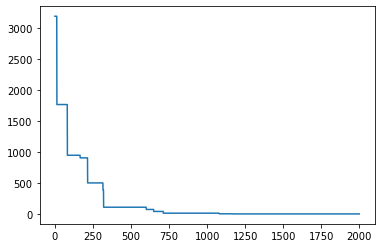

In [10]:
plt.plot(hist)
plt.show()

## ਸਮੱਸਿਆ 2: ਐਨ ਕਵੀਨਜ਼ ਸਮੱਸਿਆ

**ਕੰਮ**:  
ਤੁਹਾਨੂੰ $N$ ਕਵੀਨਜ਼ ਨੂੰ $N\times N$ ਦੇ ਆਕਾਰ ਵਾਲੇ ਚੈਸ ਬੋਰਡ 'ਤੇ ਇਸ ਤਰ੍ਹਾਂ ਰੱਖਣਾ ਹੈ ਕਿ ਉਹ ਇੱਕ ਦੂਜੇ 'ਤੇ ਹਮਲਾ ਨਾ ਕਰਨ।

ਸਭ ਤੋਂ ਪਹਿਲਾਂ, ਆਓ ਇਸ ਸਮੱਸਿਆ ਨੂੰ ਜੈਨੇਟਿਕ ਐਲਗੋਰਿਥਮਾਂ ਦੇ ਬਗੈਰ, ਪੂਰੀ ਤਲਾਸ਼ ਦੀ ਵਰਤੋਂ ਕਰਕੇ ਹੱਲ ਕਰੀਏ। ਅਸੀਂ ਬੋਰਡ ਦੀ ਸਥਿਤੀ ਨੂੰ ਸੂਚੀ $L$ ਦੁਆਰਾ ਦਰਸਾ ਸਕਦੇ ਹਾਂ, ਜਿੱਥੇ ਸੂਚੀ ਵਿੱਚ $i$-ਵਾਂ ਨੰਬਰ $i$-ਵੀਂ ਕਤਾਰ ਵਿੱਚ ਰਾਣੀ ਦੀ ਆੜਵੀਂ ਸਥਿਤੀ ਨੂੰ ਦਰਸਾਉਂਦਾ ਹੈ। ਇਹ ਸਪੱਸ਼ਟ ਹੈ ਕਿ ਹਰ ਹੱਲ ਵਿੱਚ ਸਿਰਫ ਇੱਕ ਕਤਾਰ ਵਿੱਚ ਇੱਕ ਹੀ ਰਾਣੀ ਹੋਵੇਗੀ, ਅਤੇ ਹਰ ਕਤਾਰ ਵਿੱਚ ਇੱਕ ਰਾਣੀ ਹੋਵੇਗੀ।

ਸਾਡਾ ਲਕਸ਼ ਇਹ ਹੋਵੇਗਾ ਕਿ ਸਮੱਸਿਆ ਦਾ ਪਹਿਲਾ ਹੱਲ ਲੱਭਣਾ, ਜਿਸ ਤੋਂ ਬਾਅਦ ਅਸੀਂ ਖੋਜ ਰੋਕ ਦੇਵਾਂਗੇ। ਤੁਸੀਂ ਇਸ ਫੰਕਸ਼ਨ ਨੂੰ ਸੌਖੇ ਤਰੀਕੇ ਨਾਲ ਵਧਾ ਕੇ ਰਾਣੀਆਂ ਲਈ ਸਾਰੀਆਂ ਸੰਭਾਵਿਤ ਸਥਿਤੀਆਂ ਤਿਆਰ ਕਰ ਸਕਦੇ ਹੋ।


In [11]:
N = 8

def checkbeats(i_new,j_new,l):
    for i,j in enumerate(l,start=1):
        if j==j_new:
            return False
        else:
            if abs(j-j_new) == i_new-i:
                return False
    return True

def nqueens(l,N=8,disp=True):
    if len(l)==N:
        if disp: print(l)
        return True
    else:
        for j in range(1,N+1):
            if checkbeats(len(l)+1,j,l):
                l.append(j)
                if nqueens(l,N,disp): return True
                else: l.pop()
        return False
            
nqueens([],8)


[1, 5, 8, 6, 3, 7, 2, 4]


True

ਚਲੋ ਹੁਣ ਮਾਪ ਕਰੀਏ ਕਿ 20-ਕਵੀਨ ਸਮੱਸਿਆ ਦਾ ਹੱਲ ਲੈਣ ਵਿੱਚ ਕਿੰਨਾ ਸਮਾਂ ਲੱਗਦਾ ਹੈ:


In [12]:
%timeit nqueens([],20,False)

10.6 s ± 2.17 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


ਹੁਣ ਅਸੀਂ ਇਸੇ ਸਮੱਸਿਆ ਨੂੰ ਜੈਨੇਟਿਕ ਐਲਗੋਰਿਥਮ ਦੀ ਵਰਤੋਂ ਕਰਕੇ ਹੱਲ ਕਰਦੇ ਹਾਂ। ਇਹ ਹੱਲ [ਇਸ ਬਲੌਗ ਪੋਸਟ](https://kushalvyas.github.io/gen_8Q.html) ਤੋਂ ਪ੍ਰੇਰਿਤ ਹੈ।

ਅਸੀਂ ਹਰ ਹੱਲ ਨੂੰ $N$ ਦੀ ਲੰਬਾਈ ਵਾਲੀ ਇੱਕੋ ਜਿਹੀ ਸੂਚੀ ਨਾਲ ਦਰਸਾਵਾਂਗੇ, ਅਤੇ `fit` ਫੰਕਸ਼ਨ ਵਜੋਂ ਅਸੀਂ ਉਹ ਗਿਣਤੀ ਲਵਾਂਗੇ ਜਿੰਨੀਆਂ ਰਾਣੀਆਂ ਇੱਕ ਦੂਜੇ 'ਤੇ ਹਮਲਾ ਕਰਦੀਆਂ ਹਨ:


In [13]:
def fit(L):
    x=0
    for i1,j1 in enumerate(L,1):
        for i2,j2 in enumerate(L,1):
            if i2>i1:
                if j2==j1 or (abs(j2-j1)==i2-i1): x+=1
    return x

ਜਦੋਂ ਕਿ ਫਿਟਨਸ ਫੰਕਸ਼ਨ ਦੀ ਗਣਨਾ ਕਰਨ ਵਿੱਚ ਸਮਾਂ ਲੱਗਦਾ ਹੈ, ਆਓ ਹਰ ਹੱਲ ਨੂੰ ਫਿਟਨਸ ਫੰਕਸ਼ਨ ਦੇ ਮੁੱਲ ਦੇ ਨਾਲ ਆਬਾਦੀ ਵਿੱਚ ਸੰਗ੍ਰਹਿਤ ਕਰੀਏ। ਆਓ ਸ਼ੁਰੂਆਤੀ ਆਬਾਦੀ ਪੈਦਾ ਕਰੀਏ:


In [14]:
def generate_one(N):
    x = np.arange(1,N+1)
    np.random.shuffle(x)
    return (x,fit(x))

def generate(N,NP):
    return [generate_one(N) for _ in range(NP)]

generate(8,5)

[(array([2, 3, 8, 7, 5, 4, 1, 6]), 4),
 (array([3, 4, 5, 1, 2, 8, 6, 7]), 8),
 (array([1, 3, 7, 4, 5, 8, 6, 2]), 6),
 (array([1, 5, 4, 6, 8, 3, 7, 2]), 4),
 (array([3, 5, 7, 1, 8, 6, 4, 2]), 3)]

In [15]:
def mutate(G):
    x=random.randint(0,len(G)-1)
    G[x]=random.randint(1,len(G))
    return G
    
def xover(G1,G2):
    x=random.randint(0,len(G1))
    return np.concatenate((G1[:x],G2[x:]))

xover([1,2,3,4],[5,6,7,8])

array([1, 2, 7, 8])

In [17]:
def choose_rand(P):
    N=len(P[0][0])
    mf = N*(N-1)//2 # max fitness fn
    z = [mf-x[1] for x in P]
    tf = sum(z) # total fitness
    w = [x/tf for x in z]
    p = np.random.choice(len(P),2,False,p=w)
    return p[0],p[1]

def choose(P):
    def ch(w):
        p=[]
        while p==[]:
            r = random.random()
            p = [i for i,x in enumerate(P) if x[1]>=r]
        return random.choice(p)
    N=len(P[0][0])
    mf = N*(N-1)//2 # max fitness fn
    z = [mf-x[1] for x in P]
    tf = sum(z) # total fitness
    w = [x/tf for x in z]
    p1=p2=0
    while p1==p2:
        p1 = ch(w)
        p2 = ch(w)
    return p1,p2

ਹੁਣ ਆਓ ਮੁੱਖ ਵਿਕਾਸੀ ਲੂਪ ਨੂੰ ਪਰਿਭਾਸ਼ਿਤ ਕਰੀਏ। ਅਸੀਂ ਤਰਕ ਨੂੰ ਪਿਛਲੇ ਉਦਾਹਰਨ ਤੋਂ ਥੋੜ੍ਹਾ ਵੱਖਰਾ ਬਣਾਵਾਂਗੇ, ਤਾਂ ਜੋ ਦਿਖਾ ਸਕੀਏ ਕਿ ਕੋਈ ਨਵਾਚਾਰ ਕਰ ਸਕਦਾ ਹੈ। ਅਸੀਂ ਲੂਪ ਕਰਾਂਗੇ ਜਦ ਤੱਕ ਸਾਨੂੰ ਪੂਰਨ ਹੱਲ (fitness function=0) ਨਹੀਂ ਮਿਲ ਜਾਂਦਾ, ਅਤੇ ਹਰ ਕਦਮ 'ਤੇ ਅਸੀਂ ਮੌਜੂਦਾ ਪੀੜ੍ਹੀ ਲਵਾਂਗੇ ਅਤੇ ਉਸੇ ਆਕਾਰ ਦੀ ਨਵੀਂ ਪੀੜ੍ਹੀ ਤਿਆਰ ਕਰਾਂਗੇ। ਇਹ ਕੰਮ `nxgeneration` ਫੰਕਸ਼ਨ ਦੀ ਵਰਤੋਂ ਕਰਕੇ ਕੀਤਾ ਜਾਂਦਾ ਹੈ, ਹੇਠਾਂ ਦਿੱਤੇ ਕਦਮਾਂ ਰਾਹੀਂ:

1. ਸਭ ਤੋਂ ਅਣਉਪਯੋਗ ਹੱਲਾਂ ਨੂੰ ਖਾਰਜ ਕਰੋ - ਇਸ ਲਈ ਇੱਕ `discard_unfit` ਫੰਕਸ਼ਨ ਹੈ ਜੋ ਇਹ ਕੰਮ ਕਰਦਾ ਹੈ।
1. ਪੀੜ੍ਹੀ ਵਿੱਚ ਕੁਝ ਹੋਰ ਰੈਂਡਮ ਹੱਲ ਸ਼ਾਮਲ ਕਰੋ।
1. ਨਵੀਂ ਪੀੜ੍ਹੀ ਨੂੰ ਆਕਾਰ `gen_size` ਦੇ ਨਾਲ ਭਰੋ, ਹਰੇਕ ਨਵੇਂ ਜੀਨ ਲਈ ਹੇਠਾਂ ਦਿੱਤੇ ਕਦਮਾਂ ਦੀ ਵਰਤੋਂ ਕਰਦੇ ਹੋਏ:
    - ਦੋ ਰੈਂਡਮ ਜੀਨ ਚੁਣੋ, fitness function ਦੇ ਅਨੁਪਾਤਕ ਸੰਭਾਵਨਾ ਨਾਲ।
    - ਇੱਕ crossover ਦੀ ਗਣਨਾ ਕਰੋ।
    - ਸੰਭਾਵਨਾ `mutation_prob` ਨਾਲ ਇੱਕ mutation ਲਾਗੂ ਕਰੋ।


In [20]:
mutation_prob = 0.1

def discard_unfit(P):
    P.sort(key=lambda x:x[1])
    return P[:len(P)//3]

def nxgeneration(P):
    gen_size=len(P)
    P = discard_unfit(P)
    P.extend(generate(len(P[0][0]),3))
    new_gen = []
    for _ in range(gen_size):
        p1,p2 = choose_rand(P)
        n = xover(P[p1][0],P[p2][0])
        if random.random()<mutation_prob:
            n=mutate(n)
        nf = fit(n)
        new_gen.append((n,nf))
        '''
        if (nf<=P[p1][1]) or (nf<=P[p2][1]):
            new_gen.append((n,nf))
        elif (P[p1][1]<P[p2][1]):
            new_gen.append(P[p1])
        else:
            new_gen.append(P[p2])
        '''
    return new_gen
    
def genetic(N,pop_size=100):
    P = generate(N,pop_size)
    mf = min([x[1] for x in P])
    n=0
    while mf>0:
        #print("Generation {0}, fit={1}".format(n,mf))
        n+=1
        mf = min([x[1] for x in P])
        P = nxgeneration(P)
    mi = np.argmin([x[1] for x in P])
    return P[mi]

genetic(8)

(array([4, 7, 5, 3, 1, 6, 8, 2]), 0)

In [19]:
%timeit genetic(10)

The slowest run took 18.71 times longer than the fastest. This could mean that an intermediate result is being cached.
26.4 s ± 28.7 s per loop (mean ± std. dev. of 7 runs, 1 loop each)



---

**ਅਸਵੀਕਾਰਨਾ**:  
ਇਹ ਦਸਤਾਵੇਜ਼ AI ਅਨੁਵਾਦ ਸੇਵਾ [Co-op Translator](https://github.com/Azure/co-op-translator) ਦੀ ਵਰਤੋਂ ਕਰਕੇ ਅਨੁਵਾਦ ਕੀਤਾ ਗਿਆ ਹੈ। ਜਦੋਂ ਕਿ ਅਸੀਂ ਸਹੀਤਾ ਲਈ ਯਤਨਸ਼ੀਲ ਹਾਂ, ਕਿਰਪਾ ਕਰਕੇ ਧਿਆਨ ਦਿਓ ਕਿ ਸਵੈਚਾਲਿਤ ਅਨੁਵਾਦਾਂ ਵਿੱਚ ਗਲਤੀਆਂ ਜਾਂ ਅਸੁਚੀਤਤਾਵਾਂ ਹੋ ਸਕਦੀਆਂ ਹਨ। ਇਸ ਦਸਤਾਵੇਜ਼ ਦੇ ਮੂਲ ਭਾਸ਼ਾ ਵਿੱਚ ਲਿਖੇ ਗ੍ਰੰਥ ਨੂੰ ਅਧਿਕਾਰਤ ਸਰੋਤ ਮੰਨਿਆ ਜਾਣਾ ਚਾਹੀਦਾ ਹੈ। ਮਹੱਤਵਪੂਰਨ ਜਾਣਕਾਰੀ ਲਈ, ਪੇਸ਼ੇਵਰ ਮਨੁੱਖੀ ਅਨੁਵਾਦ ਦੀ ਸਿਫਾਰਸ਼ ਕੀਤੀ ਜਾਂਦੀ ਹੈ। ਇਸ ਅਨੁਵਾਦ ਦੀ ਵਰਤੋਂ ਤੋਂ ਪੈਦਾ ਹੋਣ ਵਾਲੇ ਕਿਸੇ ਵੀ ਗਲਤ ਫਹਿਮੀ ਜਾਂ ਗਲਤ ਵਿਆਖਿਆ ਲਈ ਅਸੀਂ ਜ਼ਿੰਮੇਵਾਰ ਨਹੀਂ ਹਾਂ।
